In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [ ]:
# import os
# import json
# import torch
# import argparse
# from tqdm import tqdm
# from datasets import load_dataset
# from transformers import AutoTokenizer, AutoModel
# from torch.utils.data import DataLoader
# from torch.cuda.amp import autocast

# def parse_args():
#     # parser = argparse.ArgumentParser(description="Generate FinBert Embeddings")
#     # parser.add_argument("--dataset_name", type=str, default="sabareesh88/FNSPID_nasdaq")
#     # parser.add_argument("--split", type=str, default="train")
#     # parser.add_argument("--model_name", type=str, default="ProsusAI/finbert")
#     # parser.add_argument("--batch_size", type=int, default=32)
#     # # parser.add_argument("--output_file", type=str, default="news_embeddings.jsonl")
#     # parser.add_argument("--output_file", type=str, default=None)
#     # parser.add_argument("--max_samples", type=int, default=None, help="Optional limit on number of samples")
#     # args = parser.parse_args()
#     args = {}
#     args["dataset_name"] = "sabareesh88/FNSPID_nasdaq"
#     args["split"] = "train"
#     args["model_name"] = "ProsusAI/finbert"
#     args["batch_size"] = 128
#     args["output_file"] = "news_embeddings.jsonl"
#     args["max_samples"] = None

#     args = argparse.Namespace(**args)

#     # 自动命名输出文件
#     if args.output_file is None:
#         args.output_file = f"{args.dataset_name.replace('/', '_')}_embeddings_{args.model_name.replace('/', '_')}.jsonl"
#     return args

# # 自定义文本清洗函数
# def clean_text(example):
#     text = example["text"]
#     if not text or len(text.strip()) < 10:
#         return False  # 删除样本
#     example["text"] = text.replace("\n", " ").strip()
#     return example

# def prepare_dataset(dataset, max_samples=None):
#     print("🔧 Preprocessing dataset...")
#     # # ✅ 先过滤掉 Luhn_summary 为空或空格的样本
#     # dataset = dataset.filter(lambda x: x["Luhn_summary"] and x["Luhn_summary"].strip() != "")
#     # 构建 text 字段，并保留 text + Date
#     dataset = dataset.map(
#         lambda x: {"text": x["Article_title"] + " " + x["Luhn_summary"]},
#         remove_columns=[col for col in dataset.column_names if col not in ["text", "Date"]]
#     )
#     dataset = dataset.filter(lambda x: clean_text is not False)
#     if max_samples:
#         dataset = dataset.select(range(min(len(dataset), max_samples)))
#     return dataset

# def collate_fn(batch, tokenizer):
#     texts = [example["text"] for example in batch]
#     dates = [example["Date"] for example in batch]
#     tokenized = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
#     tokenized["Date"] = dates
#     return tokenized

# def generate_embeddings(model, tokenizer, dataset, batch_size, device, output_file, flush_every=10000):
#     print("🚀 Generating embeddings...")

#     dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=lambda x: collate_fn(x, tokenizer))
#     model.to(device)
#     model.eval()

#     buffer = []

#     with open(output_file, "w") as f_out, torch.no_grad(), autocast():
#         for batch in tqdm(dataloader, desc="Extracting embeddings"):
#             dates = batch.pop("Date")
#             batch = {k: v.to(device) for k, v in batch.items()}
#             outputs = model(**batch)
#             # cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu()  # [CLS] token
#             cls_embedding = outputs.pooler_output

#             for date, emb in zip(dates, cls_embeddings):
#                 buffer.append({
#                     "date": date,
#                     "embedding": emb.numpy().tolist()
#                 })

#             # Flush buffer every N records
#             if len(buffer) >= flush_every:
#                 f_out.write("\n".join(json.dumps(x) for x in buffer) + "\n")
#                 buffer = []

#         # Flush remaining
#         if buffer:
#             f_out.write("\n".join(json.dumps(x) for x in buffer) + "\n")

#     print(f"✅ Embeddings saved to {output_file}")


# def main():
#     args = parse_args()
#     device = "cuda" if torch.cuda.is_available() else "cpu"

#     print(f"📦 Loading dataset: {args.dataset_name} [{args.split}]")
#     dataset = load_dataset(args.dataset_name, split=args.split, )

#     dataset = prepare_dataset(dataset, max_samples=args.max_samples)

#     tokenizer = AutoTokenizer.from_pretrained(args.model_name)
#     model = AutoModel.from_pretrained(args.model_name)

#     generate_embeddings(model, tokenizer, dataset, args.batch_size, device, args.output_file)

# if __name__ == "__main__":
#     main()



import os
import json
import torch
import argparse
from tqdm import tqdm
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast


def parse_args():
    args = {
        "dataset_name": "sabareesh88/FNSPID_nasdaq",
        "split": "train",
        "model_name": "ProsusAI/finbert",
        "batch_size": 192,
        "output_file": "news_embeddings.jsonl",
        "max_samples": None,
        "flush_every": 50000
    }
    return argparse.Namespace(**args)


def clean_text(example):
    text = example["text"]
    if not text or len(text.strip()) < 10:
        return False
    example["text"] = text.replace("\n", " ").strip()
    return example


def prepare_dataset(dataset, max_samples=None):
    print("🔧 Preprocessing dataset...")
    dataset = dataset.map(
        lambda x: {"text": x["Article_title"] + " " + x["Luhn_summary"]},
        remove_columns=[col for col in dataset.column_names if col not in ["text", "Date"]]
    )
    dataset = dataset.filter(lambda x: clean_text(x) is not False)
    if max_samples:
        dataset = dataset.select(range(min(len(dataset), max_samples)))
    return dataset


def collate_fn(batch, tokenizer):
    texts = [example["text"] for example in batch]
    dates = [example["Date"] for example in batch]
    tokenized = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    tokenized["Date"] = dates
    return tokenized


def generate_embeddings(model, tokenizer, dataset, batch_size, device, output_file, flush_every):
    print("🚀 Generating embeddings...")

    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=lambda x: collate_fn(x, tokenizer))
    model.eval()                   # 设置 eval 模式
    model = torch.compile(model)   # 编译并 trace 模型图# ✅ 图编译加速
    model.to(device)               # 放到 CUDA，完成初始化


    buffer = []

    with open(output_file, "w") as f_out, torch.no_grad(), autocast():
        for batch in tqdm(dataloader, desc="Extracting embeddings"):
            dates = batch.pop("Date")
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)

            # ✅ 使用 pooled_output 替代手动取 [CLS] 向量
            pooled_embeddings = outputs.pooler_output.cpu()

            for date, emb in zip(dates, pooled_embeddings):
                buffer.append({
                    "date": date,
                    "embedding": emb.numpy().tolist()
                })

            if len(buffer) >= flush_every:
                f_out.write("\n".join(json.dumps(x) for x in buffer) + "\n")
                buffer = []

        if buffer:
            f_out.write("\n".join(json.dumps(x) for x in buffer) + "\n")

    print(f"✅ Embeddings saved to {output_file}")


def main():
    args = parse_args()
    device = "cuda" if torch.cuda.is_available() else "cpu"

    print(f"📦 Loading dataset: {args.dataset_name} [{args.split}]")
    dataset = load_dataset(args.dataset_name, split=args.split)
    dataset = prepare_dataset(dataset, max_samples=args.max_samples)

    tokenizer = AutoTokenizer.from_pretrained(args.model_name)
    model = AutoModel.from_pretrained(args.model_name)

    generate_embeddings(
        model=model,
        tokenizer=tokenizer,
        dataset=dataset,
        batch_size=args.batch_size,
        device=device,
        output_file=args.output_file,
        flush_every=args.flush_every
    )


if __name__ == "__main__":
    main()

📦 Loading dataset: sabareesh88/FNSPID_nasdaq [train]


Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/48 [00:00<?, ?it/s]

🔧 Preprocessing dataset...


<ipython-input-10-5169bbb45349>:182: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with open(output_file, "w") as f_out, torch.no_grad(), autocast():


🚀 Generating embeddings...


Extracting embeddings:   0%|          | 149/80969 [02:41<25:43:06,  1.15s/it]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '545 Group/orgi'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

In [ ]:
os.chdir(GOOGLE_DRIVE_PATH)

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
from tqdm import tqdm
import numpy as np


In [ ]:

# === 1. 设置模型和tokenizer ===
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval().cuda()  # 如果有GPU的话

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
# import pandas as pd

# url1 = "https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/All_external.csv"
# news_dataset1 = load_dataset(
#     "csv",
#     data_files={"train": url1},
#     split="train",  # 指定 split，否则默认是 DatasetDict
#     # 下面这两项避免自动推断错误类型
#     keep_in_memory=False,  # ✅ 不放入内存
#     # optional: you can set `dtype` if needed
#     on_bad_lines="skip",
#     keep_default_na=False  # This prevents empty strings from being interpreted as NaN
# )

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# url2 = "https://huggingface.co/datasets/Zihan1004/FNSPID/resolve/main/Stock_news/nasdaq_exteral_data.csv"

# news_dataset2 = load_dataset(
#     "csv",
#     data_files=url2,
#     split="train",  # 指定 split，否则默认是 DatasetDict
#     # 下面这两项避免自动推断错误类型
#     keep_in_memory=False,  # ✅ 不放入内存
#     # optional: you can set `dtype` if needed
#     on_bad_lines="skip",
#     keep_default_na=False  # This prevents empty strings from being interpreted as NaN
# )


Generating train split: 0 examples [00:00, ? examples/s]

Failed to read file '/root/.cache/huggingface/hub/datasets--Zihan1004--FNSPID/snapshots/bf9189c41527198897d1af3e17b1a0095279fc45/Stock_news/nasdaq_exteral_data.csv' with error <class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
ERROR:datasets.packaged_modules.csv.csv:Failed to read file '/root/.cache/huggingface/hub/datasets--Zihan1004--FNSPID/snapshots/bf9189c41527198897d1af3e17b1a0095279fc45/Stock_news/nasdaq_exteral_data.csv' with error <class 'pandas.errors.ParserError'>: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.


DatasetGenerationError: An error occurred while generating the dataset

In [ ]:
# news_dataset1

Dataset({
    features: ['Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary'],
    num_rows: 13057514
})

In [ ]:
# # === 2. 加载或传入 dataset ===
# # 示例：加载你自己的 Dataset，如果你已经有 dataset，可以直接传入
dataset_name = "sabareesh88/FNSPID_nasdaq"


# finnews_dataset = load_dataset(dataset_name)

from itertools import islice
from datasets import Dataset
# 使用流式加载，不会把整个文件读入内存
streamed_dataset = load_dataset(
    dataset_name,
    split="train",
    streaming=True  # ✅关键参数
)

# 用 islice 截取前 N 条数据
subset_iter = islice(streamed_dataset, 1000)  # 只取前1000条

# 转成可用的 Dataset（此时才读入这部分数据）
subset_dataset = Dataset.from_list(list(subset_iter))

README.md:   0%|          | 0.00/965 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

In [ ]:
subset_dataset

Dataset({
    features: ['Unnamed: 0', 'Date', 'Article_title', 'Stock_symbol', 'Url', 'Publisher', 'Author', 'Article', 'Lsa_summary', 'Luhn_summary', 'Textrank_summary', 'Lexrank_summary'],
    num_rows: 1000
})

In [ ]:
import pandas as pd

df = pd.DataFrame(subset_dataset)
df

,Unnamed: 0,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,0.0,2023-12-16 23:00:00 UTC,Interesting A Put And Call Options For August ...,A,https://www.nasdaq.com/articles/interesting-a-...,,,"Investors in Agilent Technologies, Inc. (Symbo...",Because the $125.00 strike represents an appro...,The current analytical data (including greeks ...,Below is a chart showing the trailing twelve m...,"At Stock Options Channel, our YieldBoost formu..."
1,1.0,2023-12-12 00:00:00 UTC,Wolfe Research Initiates Coverage of Agilent T...,A,https://www.nasdaq.com/articles/wolfe-research...,,,"Fintel reports that on December 13, 2023, Wolf...","Fintel reports that on December 13, 2023, Wolf...","T. Rowe Price Investment Management holds 10,1...",Agilent Technologies Declares $0.24 Dividend O...,The projected annual revenue for Agilent Techn...
2,2.0,2023-12-12 00:00:00 UTC,Agilent Technologies Reaches Analyst Target Price,A,https://www.nasdaq.com/articles/agilent-techno...,,,"In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...","In recent trading, shares of Agilent Technolog...",When a stock reaches the target an analyst has...,When a stock reaches the target an analyst has...
3,3.0,2023-12-07 00:00:00 UTC,Agilent (A) Enhances BioTek Cytation C10 With ...,A,https://www.nasdaq.com/articles/agilent-a-enha...,,,Agilent Technologies A is enhancing its BioTek...,"Per a Grand View Research report, the global m...","Notably, Agilent enhanced the BioTek Cytation ...","Agilent Technologies, Inc. Price and Consensus...","Notably, Agilent enhanced the BioTek Cytation ..."
4,4.0,2023-12-07 00:00:00 UTC,"Pre-Market Most Active for Dec 7, 2023 : SQQQ,...",A,https://www.nasdaq.com/articles/pre-market-mos...,,,The NASDAQ 100 Pre-Market Indicator is up 70.2...,ProShares UltraPro Short QQQ (SQQQ) is -0.15 a...,"As reported by Zacks, the current mean recomme...","The total Pre-Market volume is currently 39,23...",The NASDAQ 100 Pre-Market Indicator is up 70.2...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995.0,2021-08-23 00:00:00 UTC,One global aluminium producer seeks Q4 premium...,AA,https://www.nasdaq.com/articles/one-global-alu...,,,"TOKYO, Aug 23 (Reuters) - One global aluminium...","TOKYO, Aug 23 (Reuters) - One global aluminium...","TOKYO, Aug 23 (Reuters) - One global aluminium...","TOKYO, Aug 23 (Reuters) - One global aluminium...","TOKYO, Aug 23 (Reuters) - One global aluminium..."
996,996.0,2021-08-22 00:00:00 UTC,What’s Behind The 80% Jump In Alcoa Stock?,AA,https://www.nasdaq.com/articles/whats-behind-t...,,,Alcoa stock (NYSE: AA) has seen a large rise o...,Alcoa stock (NYSE: AA) has seen a large rise o...,You can test the answer and many other combina...,Alcoa stock (NYSE: AA) has seen a large rise o...,"For AA stock, the returns over the next N days..."
997,997.0,2021-08-20 00:00:00 UTC,White House withholds support of Democratic ca...,AA,https://www.nasdaq.com/articles/white-house-wi...,,,By Jarrett Renshaw\nAug 20 (Reuters) - The Whi...,The tax could hit companies like Rio Tinto RIO...,The tax could hit companies like Rio Tinto RIO...,The tax could hit companies like Rio Tinto RIO...,The tax could hit companies like Rio Tinto RIO...
998,998.0,2021-08-20 00:00:00 UTC,White House withholds support of Democratic ca...,AA,https://www.nasdaq.com/articles/white-house-wi...,,,By Jarrett Renshaw\nAug 20 (Reuters) - The Whi...,The United States is the closest it has ever b...,By Jarrett Renshaw Aug 20 (Reuters) - The Whit...,By Jarrett Renshaw Aug 20 (Reuters) - The Whit...,By Jarrett Renshaw Aug 20 (Reuters) - The Whit...


In [ ]:
# 可选：只保留 text 字段
column2remove = ["Date", "text"]

dataset = subset_dataset.map(lambda x: {"text": x["Article_title"]+x['Luhn_summary']},
                             remove_columns=[col for col in subset_dataset.column_names if col not in column2remove])



Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
dataset

Dataset({
    features: ['Date', 'text'],
    num_rows: 1000
})

In [ ]:
# === 3. 定义 PyTorch DataLoader for batching ===
from torch.utils.data import DataLoader

def tokenize_fn(batch):
    texts = [example["text"] for example in batch]
    dates = [example["Date"] for example in batch]
    tokenized = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    tokenized["Date"] = dates  # 把日期附加在 batch 上，后面用
    return tokenized

dataloader = DataLoader(dataset, batch_size=32, collate_fn=tokenize_fn)

In [ ]:
# === 4. 提取 [CLS] embedding 并保存 ===
all_results = []

with torch.no_grad():
    for batch in tqdm(dataloader, desc="Extracting embeddings"):
        dates = batch.pop("Date")  # list of strings
        batch = {k: v.cuda() for k, v in batch.items()}
        outputs = model(**batch)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu()  # [CLS] token

        for date, emb in zip(dates, cls_embeddings):
            all_results.append({
                "date": date,
                "embedding": emb.numpy().tolist()
            })

# # 合并并保存
# final_embeddings = torch.cat(all_results, dim=0)  # shape = (N, hidden_size)
# torch.save(final_embeddings, "news_embeddings.pt")

# 可选保存为 numpy 或 csv
# np.save("news_embeddings.npy", final_embeddings.numpy())
# np.savetxt("news_embeddings.csv", final_embeddings.numpy(), delimiter=",")


Extracting embeddings: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]


TypeError: expected Tensor as element 0 in argument 0, but got dict

In [ ]:
import json

with open("news_embeddings.jsonl", "w") as f:
    for item in all_results:
        f.write(json.dumps(item) + "\n")


In [ ]:

embdd = load_dataset("json", data_files="news_embeddings.jsonl", split="train")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

df = pd.DataFrame(embdd[0:20])
df

,date,embedding
0,2023-12-16 23:00:00 UTC,"[-0.3769211173057556, 0.7164433002471924, -0.2..."
1,2023-12-12 00:00:00 UTC,"[-0.08009231090545654, 0.7869445085525513, -0...."
2,2023-12-12 00:00:00 UTC,"[-0.028890561312437057, 0.433147668838501, -0...."
3,2023-12-07 00:00:00 UTC,"[0.3990318179130554, 0.21598267555236816, -0.7..."
4,2023-12-07 00:00:00 UTC,"[0.13553249835968018, 0.43122437596321106, 0.7..."
5,2023-12-05 00:00:00 UTC,"[-0.2612142264842987, 0.8399067521095276, -0.6..."
6,2023-11-24 00:00:00 UTC,"[-0.4185366630554199, 0.10751472413539886, -0...."
7,2023-11-22 00:00:00 UTC,"[0.528680145740509, -0.16963908076286316, -0.9..."
8,2023-11-22 00:00:00 UTC,"[0.2708974778652191, 0.16425855457782745, -0.7..."
9,2023-11-21 00:00:00 UTC,"[1.0208947658538818, -0.6495634913444519, 0.10..."


In [ ]:
type(df['date'][0])

str

In [ ]:
dataset_name = "sabareesh88/FNSPID_nasdaq"
finnews_dataset = load_dataset(dataset_name, split="train", streaming=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from datetime import datetime
from collections import Counter
date_counter = Counter()

for sample in finnews_dataset:
    # date_str = sample["Date"]
    date = sample["Date"]
    date_counter[date] += 1

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 0a7edda1-8534-499d-846e-08468351cb36)')' thrown while requesting GET https://huggingface.co/datasets/sabareesh88/FNSPID_nasdaq/resolve/7551d1738dd42480f8b7284e29b94ca361394f46/data/train-00005-of-00048.parquet
Retrying in 1s [Retry 1/5].


In [ ]:
date_counter

Buffered data was truncated after reaching the output size limit.

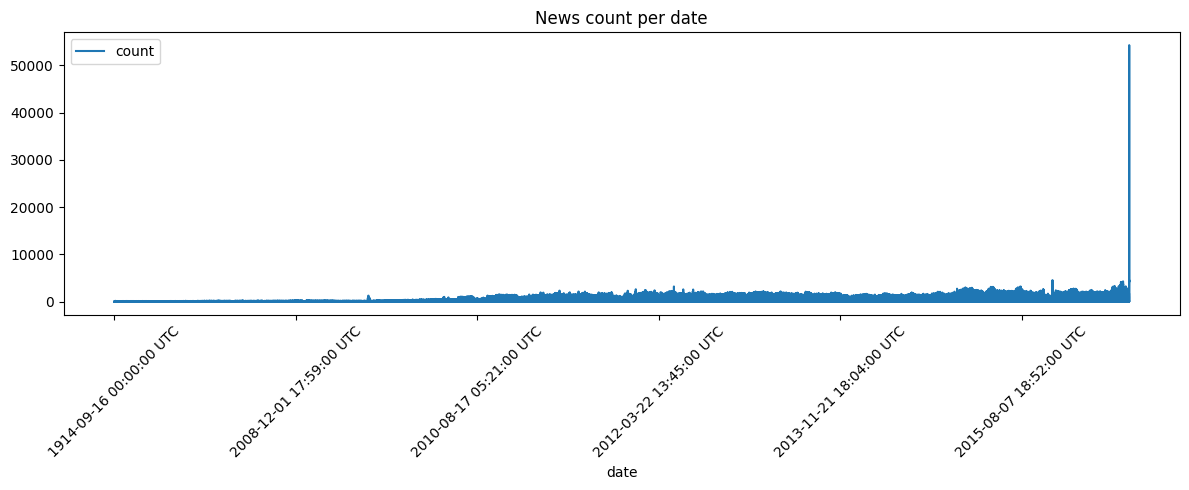

In [ ]:
import pandas as pd

df = pd.DataFrame(date_counter.items(), columns=["date", "count"])
df = df.sort_values("date")  # 按时间排序

# 可视化
import matplotlib.pyplot as plt

df.plot(x="date", y="count", kind="line", figsize=(12, 5))
plt.title("News count per date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
min_date = None

for example in finnews_dataset["train"]:
    date_str = example["Date"]
    try:
        # 你可以根据你的格式自定义，比如 "%Y-%m-%d"
        date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    except Exception as e:
        continue  # 忽略非法日期

    if (min_date is None) or (date_obj < min_date):
        min_date = date_obj

KeyboardInterrupt: 